<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Data%20Analysis%20on%20a%20Random%20Dataset/Ron_RandamDatsetAnalysisProgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis on a Random Dataset

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df=pd.read_csv('randomDataset.csv',index_col=0)

In [ ]:
df.head()

,ID2,ID3,ID4,ID5,ID6,ID7,ID8,Target
ID1,,,,,,,,
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,-24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


# 1 Describe the data (statistics of data set) 

In [ ]:
df['Target'].describe()

count    77.000000
mean     49.506494
std      28.690556
min       1.000000
25%      25.000000
50%      50.000000
75%      74.000000
max      98.000000
Name: Target, dtype: float64

In [ ]:
df.describe()

,ID3,ID4,ID5,ID6,ID7,ID8,Target
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,4.611688,19.532468,14.022078,19.094805,33.798701,25350.155844,49.506494
std,4.071207,15.046773,9.855330,13.769578,13.818690,15648.218867,28.690556
min,-6.000000,-33.000000,-23.000000,-37.000000,-44.000000,-8201.000000,1.000000
25%,1.900000,12.900000,8.800000,11.500000,31.600000,15754.000000,25.000000
50%,3.800000,18.400000,13.700000,18.400000,38.000000,21323.000000,50.000000
75%,6.800000,28.600000,19.700000,26.600000,40.500000,28887.000000,74.000000
max,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID2     77 non-null     object 
 1   ID3     77 non-null     float64
 2   ID4     77 non-null     float64
 3   ID5     77 non-null     float64
 4   ID6     77 non-null     float64
 5   ID7     77 non-null     float64
 6   ID8     77 non-null     int64  
 7   Target  77 non-null     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 5.4+ KB


In [ ]:
df.shape

(77, 8)

# **2 Data Visualization**

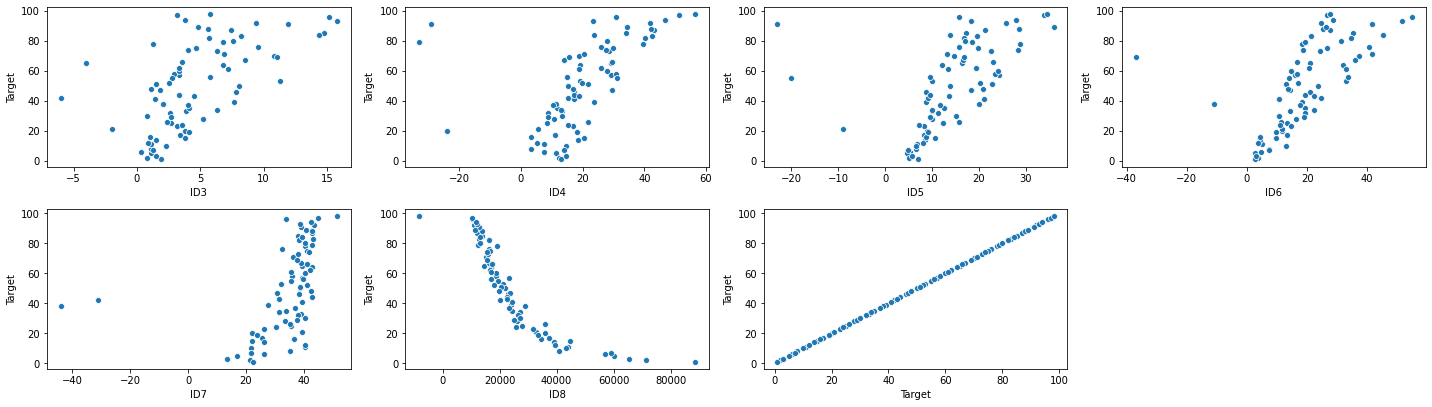

In [ ]:
features = df.select_dtypes(exclude='object').copy()
f = plt.figure(figsize=(20,25))

for i in range(len(features.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(features.iloc[:,i],df['Target'])
    plt.xlabel(features.columns[i])
    
plt.tight_layout()
plt.show()

## To visualize the outliers

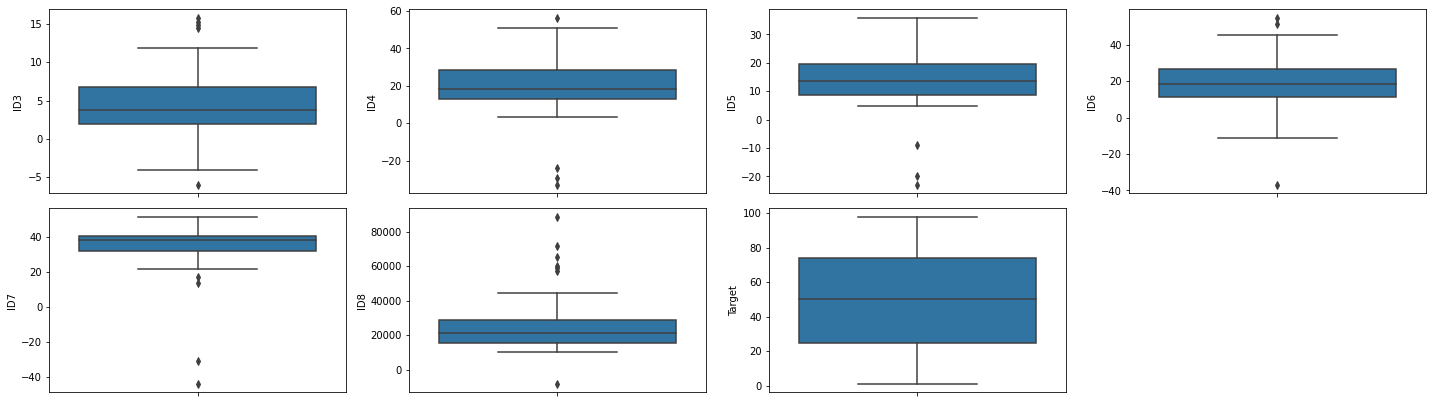

In [ ]:
fig = plt.figure(figsize=(20, 25))

for i in range(len(features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=features.iloc[:,i])

plt.tight_layout()
plt.show()

### To Visualize Correlation

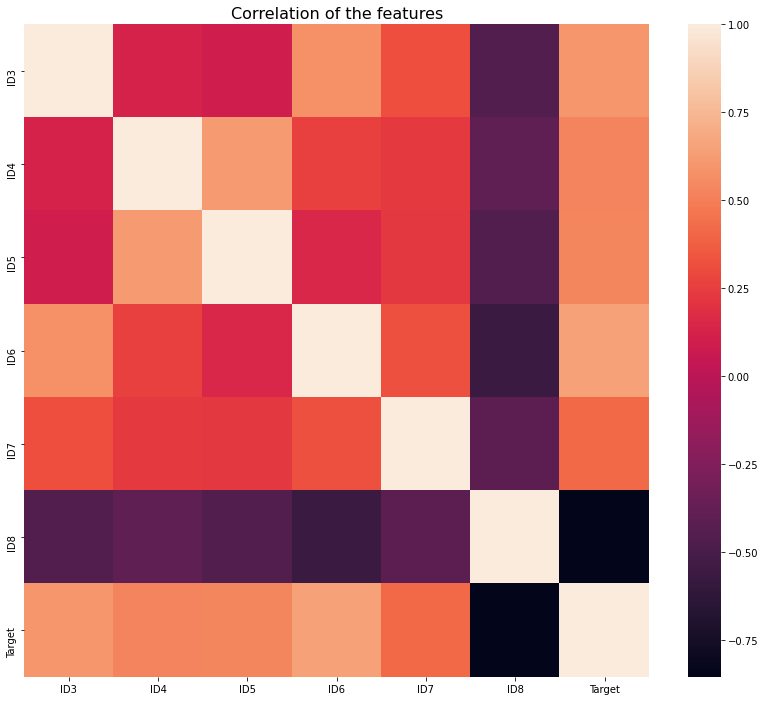

In [ ]:
correlation = df.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of the features', size=16)
sns.heatmap(correlation)
plt.show()

# 3 Data Preprocessing

In [ ]:
df.select_dtypes(exclude=['object']).columns

Index(['ID3', 'ID4', 'ID5', 'ID6', 'ID7', 'ID8', 'Target'], dtype='object')

In [ ]:
df.select_dtypes(exclude=['object'])

,ID3,ID4,ID5,ID6,ID7,ID8,Target
ID1,,,,,,,
1,7.7,23.6,8.7,18.2,27.5,23939,39
2,7.8,17.2,8.8,20.8,38.5,23040,46
3,3.8,-24.0,8.9,11.8,22.2,35787,20
4,3.4,10.9,8.2,13.4,25.5,37524,17
5,0.3,7.5,5.2,4.5,26.2,57123,6
...,...,...,...,...,...,...,...
73,1.1,16.9,20.8,13.7,42.6,19713,48
74,1.0,3.4,8.7,4.3,36.8,34381,16
75,0.8,13.2,15.0,10.8,40.3,27149,30


In [ ]:
t_list = list(df['Target'])
filtered_t_list=[None]*len(t_list)
len(filtered_t_list)

77

In [ ]:
q=3
for i in range(q-1):
 filtered_t_list[i]=t_list[i]
filtered_t_list[1:3]

[46, None]

In [ ]:
q=3
for i in range(q-1):
 filtered_t_list[i] = t_list[i]
for i in range(q-1, len(t_list)):
 start_i = (i+1)-q
 end_i = i+1
 filtered_t_list[i] = sum(t_list[ start_i:end_i ])/3.0

filtered_t_list[:10]

[39,
 46,
 35.0,
 27.666666666666668,
 14.333333333333334,
 9.333333333333334,
 4.333333333333333,
 2.6666666666666665,
 3.6666666666666665,
 10.0]

# 4 Implement Regression and split data into training and test data

In [ ]:
x = df[['ID3', 'ID4', 'ID5' ,'ID6', 'ID7', 'ID8']].values.reshape(-1,6)
y = df['Target'].values.reshape(-1,1)

In [ ]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_sq = regressor.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8510704204987025


In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[48.37313917]
[[ 1.61817919e+00  2.97083386e-01  4.20211960e-01  3.20479998e-01
   1.50243368e-02 -9.72440031e-04]]


In [ ]:
y_pred = regressor.predict(x)
de = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
de

,Actual,Predicted
0,39,54.466794
1,46,54.642039
2,20,20.446598
3,17,28.746608
4,6,-0.441074
...,...,...
72,48,49.775157
73,16,23.154745
74,30,37.558253
75,24,40.589462


In [ ]:
fig = px.scatter(de, x="Actual", y="Predicted", color='Predicted', marginal_y="box",
marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
print('train data:',X_train.shape)
print('test data:', X_test.shape)

train data: (61, 6)
test data: (16, 6)


# 5 Mean Squared error

In [ ]:
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 120.99899107635001
